# huobi / bitmex 高频套利策略研究

## 价差分析

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('../data/saved_price_diff_20181108.csv')

In [4]:
df.columns = df.columns.str.strip()
df['snapshotTime'] = df.snapshotTime.astype('datetime64[ns]')
df = df.set_index('snapshotTime')

df.head()

,huobiExchangeTime,bitmexExchangeTime,huobiPrice,bitmexPrice,huobi_bid1,huobi_ask1,bitmex_bid1,bitmex_ask1,spread_last,spread_bid,spread_ask
snapshotTime,,,,,,,,,,,
2018-11-04 12:49:11.800481,2018-11-04 12:49:06.955000,2018-11-04T12:49:10.487Z,6405.74,6346.5,6403.96,6405.73,6346.5,6347.0,59.24,56.96,59.23
2018-11-04 12:49:12.301067,2018-11-04 12:49:06.955000,2018-11-04T12:49:10.487Z,6405.74,6346.5,6403.96,6405.73,6346.5,6347.0,59.24,56.96,59.23
2018-11-04 12:49:12.801638,2018-11-04 12:49:06.955000,2018-11-04T12:49:10.487Z,6405.74,6346.5,6403.96,6405.73,6346.5,6347.0,59.24,56.96,59.23
2018-11-04 12:49:13.302209,2018-11-04 12:49:06.955000,2018-11-04T12:49:10.487Z,6405.74,6346.5,6403.96,6405.73,6346.5,6347.0,59.24,56.96,59.23
2018-11-04 12:49:13.802774,2018-11-04 12:49:06.955000,2018-11-04T12:49:10.487Z,6405.74,6346.5,6403.96,6405.73,6346.5,6347.0,59.24,56.96,59.23


In [43]:
# plot price_diff

def price_diff_plot(df):
    with plt.style.context('classic'):
        fig, axs = plt.subplots(2,1, figsize=(16,9))
        
        #df['spread_last'].plot(ax=axs[0], label='spread: last_price')
        df['spread_bid'].plot(ax=axs[0], label='spread: bid')
        df['spread_ask'].plot(ax=axs[0], label='spread: ask')
        axs[0].legend()

        df['huobiPrice'].plot(ax=axs[1], label='huobi')
        df['huobi_bid1'].plot(ax=axs[1], label='huobi_bid')
        df['huobi_ask1'].plot(ax=axs[1], label='huobi_ask')
        df['bitmexPrice'].plot(ax=axs[1], label='bitmex')
        df['bitmex_bid1'].plot(ax=axs[1], label='bitmex_bid')
        df['bitmex_ask1'].plot(ax=axs[1], label='bitmex_ask')
        axs[1].legend()

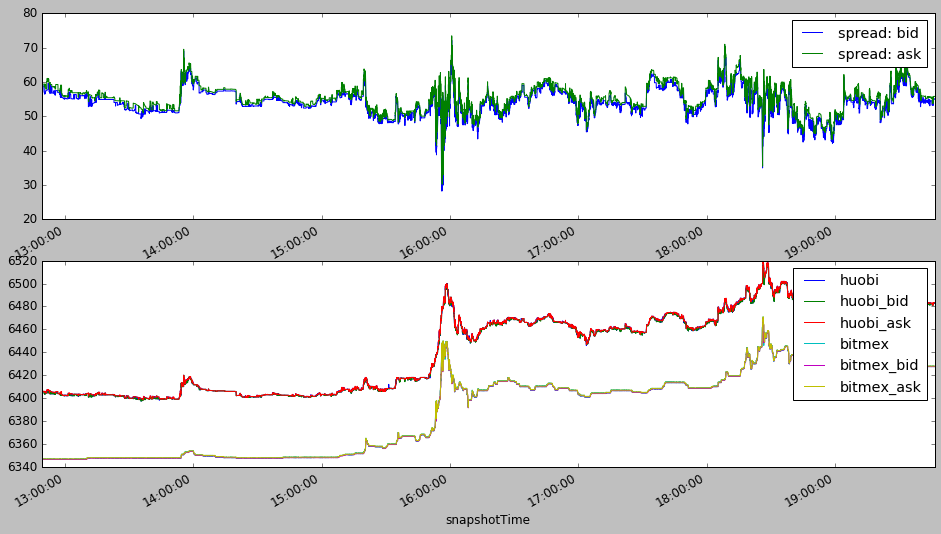

In [44]:
price_diff_plot(df.iloc[:50000])

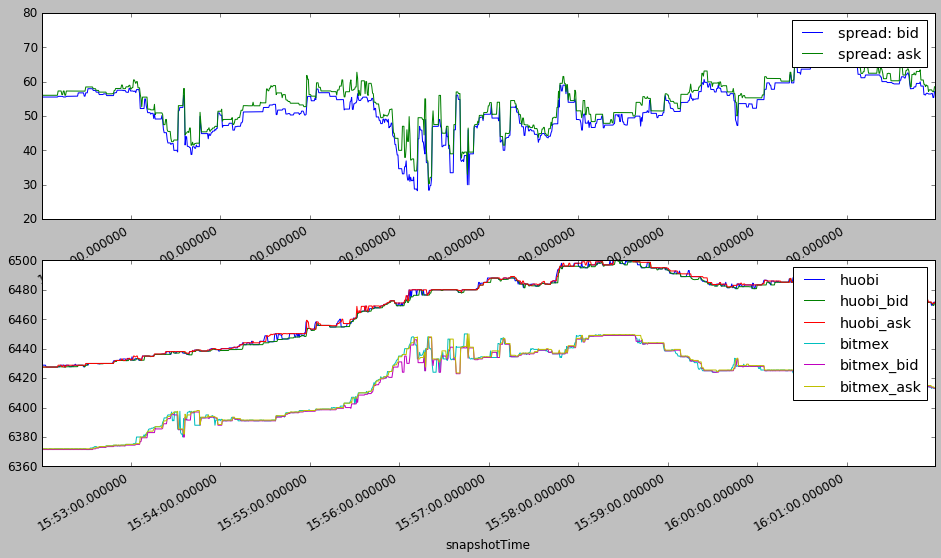

In [46]:
# sub time frame

sub_df = df[(np.datetime64('2018-11-04 15:52:00') < df.index.values) & 
            (df.index.values < np.datetime64('2018-11-04 16:01:59'))]
price_diff_plot(sub_df)

## TODO 2018/11/04

research:

- [DONE] record bid, ask    
- [DONE] use spread-trading price diff
    + spread_ask. Price of Long sparead (long huobi, short bitmex): huobi_ask - bitmex_bid 
    + spread_bid. Price of Short Sparead (short huobi, long bitmex): huobi_bid - bitmex_ask

tech:

- use db


## TODO 2018/11/08

- record all ticks instead of snapshot
- use the whole ws recv dat as "one tick"
- use db instead of file